In [96]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#creating a start date and end date
start = '2017-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

#creating the dataframe
df= data.DataReader('AAPL', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2017-01-03  29.082500  28.690001  28.950001  29.037500  115127600.0  27.174761
2017-01-04  29.127501  28.937500  28.962500  29.004999   84472400.0  27.144337
2017-01-05  29.215000  28.952499  28.980000  29.152500   88774400.0  27.282385
2017-01-06  29.540001  29.117500  29.195000  29.477501  127007600.0  27.586529
2017-01-09  29.857500  29.485001  29.487499  29.747499  134247600.0  27.839209
                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-12-02  148.000000  145.649994  145.960007  147.809998  65421400.0   
2022-12-05  150.919998  145.770004  147.770004  146.630005  68826400.0   
2022-12-06  147.300003  141.919998  147.070007  142.910004  64727200.0   
2022-12-07  143.369995  140.000000  142.190002  140.940002  69721100.0   
202

(1495, 6)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1495 entries, 2017-01-03 to 2022-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1495 non-null   float64
 1   Low        1495 non-null   float64
 2   Open       1495 non-null   float64
 3   Close      1495 non-null   float64
 4   Volume     1495 non-null   float64
 5   Adj Close  1495 non-null   float64
dtypes: float64(6)
memory usage: 81.8 KB
(1495, 6)


<AxesSubplot: xlabel='Date'>

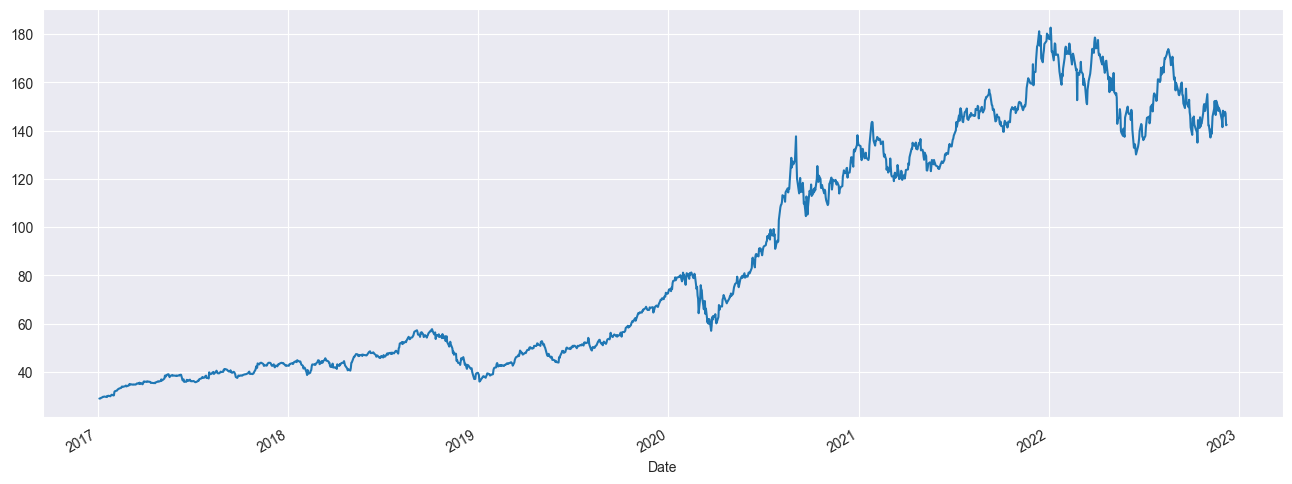

In [97]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
df.info()
print(df.shape)

df['Open'].plot(figsize=(16,6))

In [98]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,29.082500,28.690001,28.950001,29.037500,115127600.0
1,29.127501,28.937500,28.962500,29.004999,84472400.0
2,29.215000,28.952499,28.980000,29.152500,88774400.0
3,29.540001,29.117500,29.195000,29.477501,127007600.0
4,29.857500,29.485001,29.487499,29.747499,134247600.0


In [111]:
#seperate the data into train and test data

train_headers = ['High','Low', 'Open','Volume']
target_headers = ['Close']

x = df[train_headers]
y = df[target_headers].pop('Close')

print(x.shape)
print(y.shape)

from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(x)

train_header_array

X_train, X_test, y_train, y_test = train_test_split(train_header_array,y, test_size = 0.3, random_state =1)

print(X_train.shape)
print(X_test.shape)

(1495, 4)
(1495,)
(1046, 4)
(449, 4)


In [112]:
# setting up the Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
rgr = LinearRegression()
rgr.fit(X_train, y_train)

#getting the coefficient and intercept of the model
print('The coefficient of the model is ',rgr.coef_)
print('The intercept of the model is ',rgr.intercept_)

The coefficient of the model is  [ 1.33780259e+02  1.25502846e+02 -1.08219955e+02  1.87816236e-03]
The intercept of the model is  28.85766618136214


In [113]:

#predict the model
y_pred = rgr.predict(X_test)
print(y_pred)
print(y_test)

print(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

[ 38.94716997  35.54605069 149.20259753  41.22857221 116.22983994
  91.6391775  114.14677819 132.22410491 141.5057615   44.02579952
  54.77350594  38.31985974 151.25054615  38.56170177  54.46893633
 133.76645951  40.38592844 123.21263268 130.03347216  53.9041913
 144.90074421 160.13749148 144.33175272 145.38680385  38.21029279
 127.31404362 170.59168895 125.16151956 139.20542303  70.03133047
 172.16789099  43.89219211  77.27790474 120.65858406  42.56363171
 133.65770934  70.1192337   34.17834798  35.18846043 127.92765194
 129.06183442  47.0764087   54.91844239  51.19281714  97.19494409
  57.3955493  148.7103617   97.71584841 151.49666537  39.24206732
 165.76775161 179.41860505 117.23305862  44.57803501 121.81797135
 150.50218237  53.27202656 130.02526569  56.58278689  47.56292747
 151.53026416 156.32128353  49.38231589  37.99657096 174.22127286
  44.090331    42.5998314   42.33392038 148.14930949  43.22310645
  65.42955252  55.0790814  129.20743802  43.01110857 117.05331579
  81.201184

In [116]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
91       38.924999        38.947170
75       35.567501        35.546051
1210    148.690002       149.202598
330      41.055000        41.228572
961     116.599998       116.229840
...            ...              ...
494      40.222500        40.379180
581      51.075001        50.667798
154      39.962502        39.909965
643      51.755001        51.848485
774      77.377502        77.966732

[449 rows x 2 columns]


In [117]:
dfr.head(10)

,Actual Price,Predicted Price
91,38.924999,38.947170
75,35.567501,35.546051
1210,148.690002,149.202598
330,41.055000,41.228572
961,116.599998,116.229840
880,91.027496,91.639178
930,115.360001,114.146778
1076,132.029999,132.224105
1378,141.660004,141.505761
335,44.222500,44.025800


In [105]:
rgr.predict([[269.06, 263.2800, 254.5376, 6189026]])

C:\Users\dagbo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([274.3802371])